   # 🛳️ **Titanic Survival Prediction**  

   ###   👩🏻‍💻 By Rosy  

# ***🎯 Goals & Tasks:*** 

* 1. Provide insight by means of data. 

# ***🗂️ Import Libraries*** 

In [1]:
import os

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore') 

# ***⏳ Data Loading*** 

In [2]:
os.listdir('/kaggle/input/titanic-data')  
df = pd.read_csv('/kaggle/input/titanic-data/train.csv') 

# ***🔭 Data Exploration***  

### 1. 🔍 **Take a Glimpse of Data**

In [3]:
df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. 🔍 **DataType of Each Column**

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. 🔍 **Dimensions of the DataFrame**

In [5]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')  

Rows: 891
Columns: 12


### 4. 🔍 **Descriptive Statistics for numerical & categorical variables**

In [6]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
categorical_var = df.dtypes[df.dtypes == 'object'].index 
df[categorical_var].describe()  

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 5. 🔍 **Missing Values & Outliers**

In [8]:
df.isnull().sum().sort_values(ascending = False) 

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
(df.isnull().sum() / len(df)).sort_values(ascending = False) 

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

<Axes: >

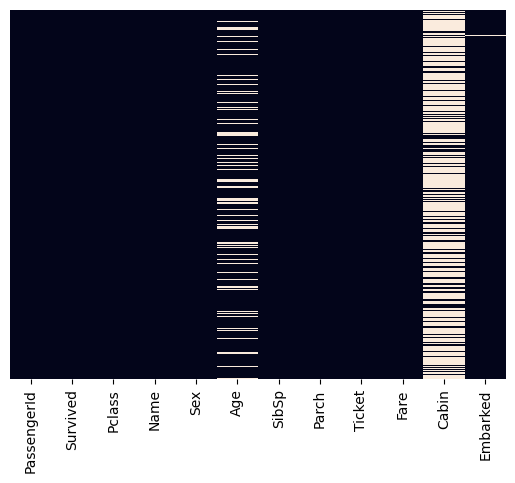

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 

###  📝 ***Conclusions from Data Exploration***

1. The columns have float datatypes are 2, integer datatype 5, object datatype are 5

2. There are 891 rows and 12 columns in the dataset.

# 🔨  ***Data Cleaning & Preprocessing***  

### 1. 🔍 **Col: PassengerId**

*  "PassengerId" is an arbitrary identifier assigned to each passenger.

In [11]:
df.drop(['PassengerId'], axis=1, inplace=True)  

### 2. 🔍 **Col: Sex**

* Convert to numerical features which would be better for prediciton.  

In [12]:
sex = pd.get_dummies(df['Sex'], drop_first=True, dtype=int)     

In [13]:
df = pd.concat([df,sex], axis=1)  

In [14]:
df.drop('Sex', axis=1, inplace=True) 

In [15]:
df = df.rename(columns = {'male':'Sex'}) 

### 3. 🔍 **Col: Age** 

In [16]:
df['Age'].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
missing_ages = np.where(df['Age'].isnull())    
len(missing_ages[0])  

177

In [18]:
sns.set_style('whitegrid') 

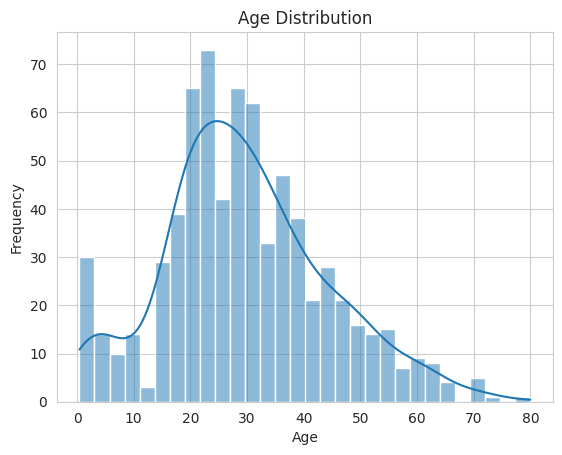

In [19]:
sns.histplot(df['Age'].dropna(), 
             bins=30,
             kde=True) 

plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.show() 

### 📝 ***Conclusion*** :  

1. The Age column had 177 missing values.

2. A skewed towards younger passengers between 20-30 years old. 
   
3. Since age is a numerical feature that needs to be used for prediction --> It is necessary to deal with these missing values.   

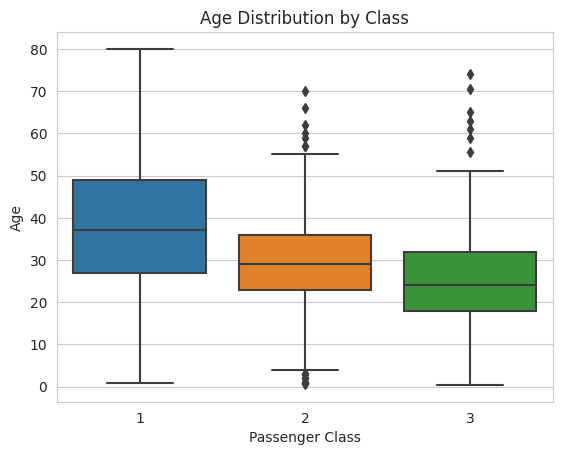

In [20]:
sns.boxplot(x='Pclass', 
            y='Age', 
            data=df) 

plt.xlabel('Passenger Class')
plt.title('Age Distribution by Class')
plt.show() 

### 📝 ***Conclusion*** :  

* The median age of the First Class is higher than that of the Second Class and Third Class. 

In [21]:
df.groupby('Pclass')['Age'].median() 

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [22]:
def impute_ages(cols):
    Age = cols[0]
    Pclass = cols[1] 

    if pd.isnull(Age):
        if Pclass == 1:
            return 37 
        elif Pclass == 2: 
            return 29 
        else:
            return 24 
    else: 
        return Age

In [23]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_ages, axis=1)  

<Axes: >

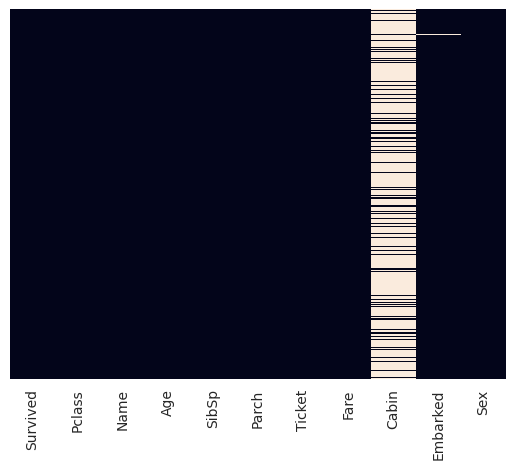

In [24]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 

### 4. 🔍 **Col: Ticket**


In [25]:
df['Ticket'][0:10] 

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [26]:
df['Ticket'].describe() 

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

### 📝 ***Conclusion*** : 

1. Ticket is a categorical variable which has **680 unique** values.
   
2. Categorical variables with almost as many as levels as there are records are often not practical for prediction.

### 🛠️ ***Feature Engineering of Ticket*** :
        1. Extract prefix if one ticket including letters and target encoding.
        2. Create a column that contains boolean values to show if the ticket is pure numeric or not. 
        3. Count the frequency of each ticket. 

In [27]:
def extract_prefix(ticket):
    parts = ticket.replace('.', '').replace('/','').split() 
    prefix = [p for p in parts if not p.isdigit()] 
    return prefix[0] if prefix else 'None' 

df['Ticket_Prefix'] = df['Ticket'].apply(extract_prefix) 

df['Ticket_IsNumeric'] = df['Ticket'].apply(lambda x: x.isdigit()).astype(int) 

ticket_counts = df['Ticket'].value_counts() 
df['Ticket_Freq'] = df['Ticket'].map(ticket_counts) 

df[['Ticket', 'Ticket_Prefix', 'Ticket_IsNumeric', 'Ticket_Freq', 'Pclass','Survived']].sample(10) 

,Ticket,Ticket_Prefix,Ticket_IsNumeric,Ticket_Freq,Pclass,Survived
292,SC/Paris 2163,SCParis,0,1,2,0
123,27267,None,1,1,2,1
297,113781,None,1,4,1,0
311,PC 17608,PC,0,2,1,1
627,13502,None,1,3,1,1
636,STON/O 2. 3101292,STONO,0,1,3,0
46,370371,None,1,1,3,0
282,345778,None,1,1,3,0
228,236171,None,1,1,2,0
566,349205,None,1,1,3,0


### 5. 🔍 **Col: Cabin**  

In [28]:
df['Cabin'][0:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [29]:
df['Cabin'].describe() 

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

1. The Cabin column has 147 unique values, which may not be particularly useful for prediction.

2. On the other hand, the names for the cabin variable seem to have a regular structure: a capital letter followed by a number --> use this structure to reduce the number of levels to make categories large enough, which may be useful for prediction.  

In [30]:
convert_cabin = df['Cabin'].astype(str) 
Cabin_Initial = np.array([Cabin[0] for Cabin in convert_cabin]) 
Cabin_Initial = pd.Categorical(Cabin_Initial) 
df['Cabin'] = Cabin_Initial

In [31]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int) 

### 6. 🔍 **Embarked**  

In [32]:
embark = pd.get_dummies(df['Embarked'], drop_first=True, dtype=int)
df = pd.concat([df, embark], axis=1)   

In [33]:
df.drop('Embarked', axis=1, inplace=True) 

### 6. 🔍 **Combine Col SibSp with Col Parch to Create a New Variable: Family**  

In [34]:
df['Family'] = df['SibSp'] + df['Parch'] 

most_family = np.where(df['Family'] == max(df['Family'])) 
df[['Name', 'Ticket_Prefix', 'Pclass', 'Family', 'Survived']].loc[most_family]   

,Name,Ticket_Prefix,Pclass,Family,Survived
159,"Sage, Master. Thomas Henry",CA,3,10,0
180,"Sage, Miss. Constance Gladys",CA,3,10,0
201,"Sage, Mr. Frederick",CA,3,10,0
324,"Sage, Mr. George John Jr",CA,3,10,0
792,"Sage, Miss. Stella Anna",CA,3,10,0
846,"Sage, Mr. Douglas Bullen",CA,3,10,0
863,"Sage, Miss. Dorothy Edith ""Dolly""",CA,3,10,0


In [35]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    int64   
 1   Pclass            891 non-null    int64   
 2   Name              891 non-null    object  
 3   Age               891 non-null    float64 
 4   SibSp             891 non-null    int64   
 5   Parch             891 non-null    int64   
 6   Ticket            891 non-null    object  
 7   Fare              891 non-null    float64 
 8   Cabin             891 non-null    category
 9   Sex               891 non-null    int64   
 10  Ticket_Prefix     891 non-null    object  
 11  Ticket_IsNumeric  891 non-null    int64   
 12  Ticket_Freq       891 non-null    int64   
 13  Has_Cabin         891 non-null    int64   
 14  Q                 891 non-null    int64   
 15  S                 891 non-null    int64   
 16  Family            891 non-

In [36]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,Ticket_Prefix,Ticket_IsNumeric,Ticket_Freq,Has_Cabin,Q,S,Family
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,n,1,A5,0,1,1,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,PC,0,1,1,0,0,1
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,n,0,STONO2,0,1,1,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,0,None,1,2,1,0,1,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,n,1,None,1,1,1,0,1,0


# 🎥   ***Data Visualization***   

### 1. 🔍 **Survivial Rate Distribution**

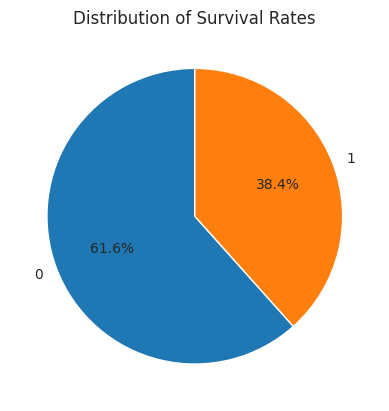

In [37]:
df['Survived'].value_counts().plot(kind='pie',
                                   startangle= 90, 
                                   autopct = '%1.1f%%') 

plt.ylabel('')
plt.title('Distribution of Survival Rates')
plt.show()   

### 2. 🔍 **Create a subplot that displays the count of survivors categorized by gender & port of embarkation & Pclass**

In [38]:
cate_cols = ['Sex', 'Pclass'] 
target = 'Survived' 

In [39]:
fig = plt.figure(figsize = (25, len(cate_cols)*6))  

<Figure size 2500x1200 with 0 Axes>

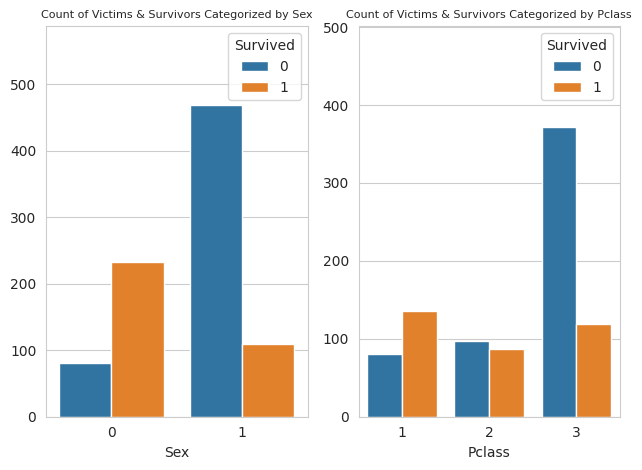

In [40]:
for i, col in enumerate(cate_cols):
    plt.subplot(len(cate_cols)//2 + len(cate_cols)%2, 2, i+1) 
    sns.countplot(x=col, hue=target, data=df) 
    plt.title(f'Count of Victims & Survivors Categorized by {col}', fontsize=8) 
    plt.ylim(0, df[col].value_counts().max()+10) 
    plt.ylabel('')


plt.tight_layout() 
plt.show() 


### 3. 🔍 **Create a histplot that displays the count of survivors categorized by Age**

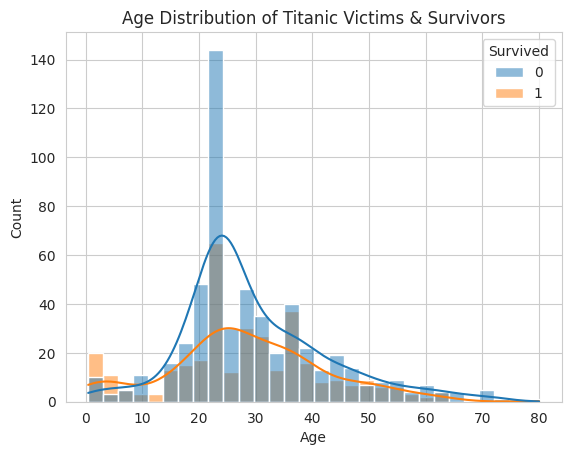

In [41]:
sns.histplot(data=df,
             x='Age', 
             hue='Survived', 
             bins=30,
             kde=True) 

plt.title('Age Distribution of Titanic Victims & Survivors')
plt.show()

### 4. 🔍 **Create a Barplot that Displays Survived Distribution Categorized by Sex in Three Pclasses**

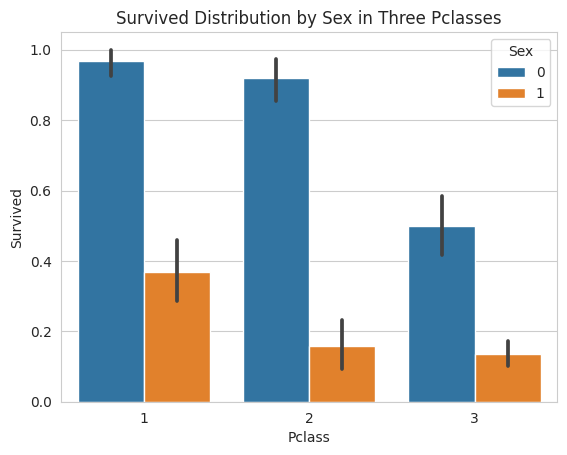

In [42]:
sns.barplot(x='Pclass',
            y = 'Survived', 
            hue = 'Sex', 
            data = df) 

plt.title('Survived Distribution by Sex in Three Pclasses') 
plt.show() 

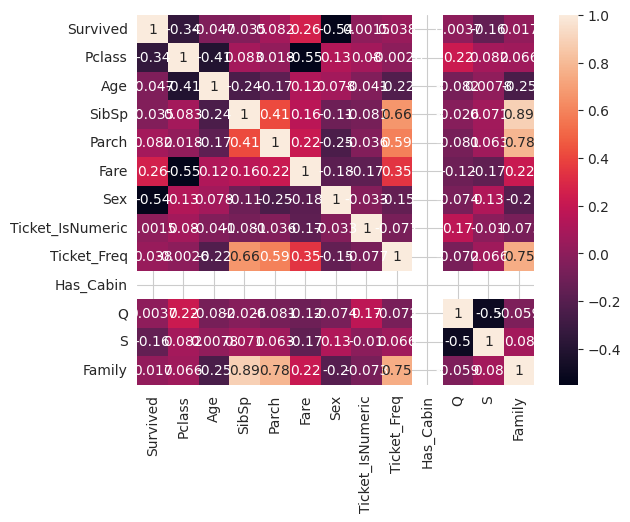

In [43]:
sns.heatmap(df.corr(numeric_only=True), annot=True)   
plt.show() 

# 🤖   ***Machine Learning***   

### 1. 🔍 **Modeling**

In [44]:
df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Ticket_Prefix'], axis=1, inplace=True) 

In [45]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Age               891 non-null    float64
 3   Fare              891 non-null    float64
 4   Sex               891 non-null    int64  
 5   Ticket_IsNumeric  891 non-null    int64  
 6   Ticket_Freq       891 non-null    int64  
 7   Has_Cabin         891 non-null    int64  
 8   Q                 891 non-null    int64  
 9   S                 891 non-null    int64  
 10  Family            891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [46]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex', 'Ticket_IsNumeric',
       'Ticket_Freq', 'Has_Cabin', 'Q', 'S', 'Family'],
      dtype='object')

In [47]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [49]:
log_model = LogisticRegression () 
log_model.fit(X_train, y_train)  

LogisticRegression()

In [50]:
predictions = log_model.predict(X_test) 

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.71      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)  

array([[137,  20],
       [ 32,  79]])